# Machine Learning - Appendices

## Preparing Data Samples for ML

In [2]:
# general imports
%matplotlib inline

# numpy and matplotlib
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats

# possible styles: ggplot (simplicity), bmh (scientify data), 
matplotlib.style.use('ggplot')

# ploting images
from IPython.display import display, Image

In [3]:
import time

print ' Last Execution ', time.asctime()

 Last Execution  Sat Jan 28 20:08:27 2017


----

**Example:** Prepare the data: Generate $n$ samples, each one has $m$ features, $\{ x_i | i=1, \dots, m \}$, that are random variables with respect a normal distribution. Devide the sample in two cathegories, depending, if its distance square, $\chi^2$, is greather or not that a value $k$.

$$
\chi^2 = \sum_{i=1}^m x_i^2
$$


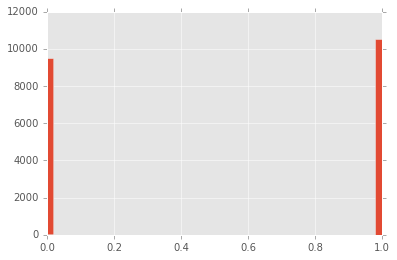

In [30]:
#--- Example  of how to generate a panda DataFrame and how to recover into scikit DataSets

## Data generation
nsamples = 20000
nfeatures = 10
chi2cut = 9.

xs = [stats.norm.rvs(size=nsamples) for i in range(nfeatures)]
def chi2i(i, xs):
    return np.sum(np.array([xi[i]*xi[i] for xi in xs]))
    
chi2 = np.array([chi2i(i, xs) for i in range(nsamples)])                
target = np.array([int(ichi2 > chi2cut) for ichi2 in chi2])

plt.hist(target,  bins=50);

# create panda Data
pan = {}
pan['target'] = target
for i, xi in enumerate(xs):
    pan['x'+str(i)] = xi

dpan = pd.DataFrame(pan)
dpan.to_csv('chi2.csv')

In [5]:
# get back the panda dataframe and prepare the X data and y targer for ML

keys = pan.keys()
keys.remove('target')
print keys
data = dpan.as_matrix(keys)
target = dpan['target'].values
print 'data ', data.shape
print 'target ', target.shape

X = data
y = target
ntrain = nsamples/2
X_train, y_train = X[:ntrain], y[:ntrain]
X_test, y_test = X[ntrain:], y[ntrain:]

signal = y_test > 0.8
background = y_test < 0.2

['x2', 'x3', 'x0', 'x1', 'x4']
data  (10000, 5)
target  (10000,)


2337 2337
2663 2663


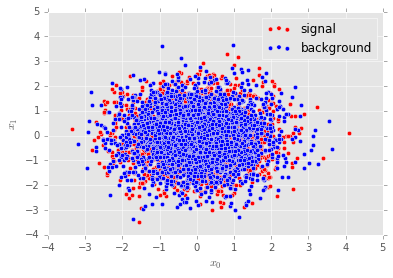

In [6]:
fig, ax = plt.subplots()

print len(X_train[signal, 0]), len(X_train[signal, 1])
print len(X_train[background, 0]), len(X_train[background, 1])

ax.scatter(X_train[signal,0], X_train[signal,1], c='red', 
           label='signal')
ax.scatter(X_train[background,0], X_train[background,1], c='blue', 
           label='background')
ax.set_xlabel(r"$x_0$")
ax.set_ylabel(r"$x_1$")
ax.legend();


In [7]:
# recover the panda DataFrame
dpan = pd.read_csv('chi2.csv')

In [8]:
# get back the features names and target
labels = [str(label) for label in dpan.columns]
print labels

['Unnamed: 0', 'target', 'x0', 'x1', 'x2', 'x3', 'x4']


In [9]:
# recreate the n-sample and target
X = dpan.as_matrix(['x0', 'x1', 'x2', 'x3', 'x4'])
y = dpan.target.values

------

radii  [ 1.01217527  1.05511541  1.78092251]
angles  [ 2.98877021  4.10608233  5.52728941]
sigmas  [ 1.54679011  1.72908265  1.2787719 ]
[-1.88005869 -0.74888582 -3.02176889 ..., -2.346121    2.10038882
  0.55649137]


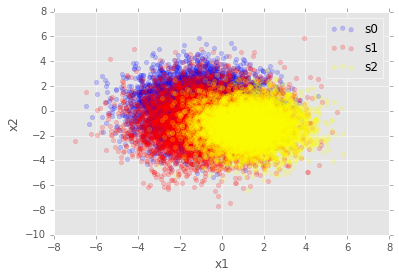

In [28]:
name='gaus_c3'
nclasses = 3
nsamples = 20000
nfeatures = 2

rs = 1.+stats.uniform.rvs(size=nclasses)
phis = 2.*np.pi*stats.uniform.rvs(size=nclasses)
sigmas = 1.+stats.uniform.rvs(size=nclasses)
print 'radii ', rs
print 'angles ', phis
print 'sigmas ', sigmas

gens = nfeatures*[[],]
gens[0] = [stats.norm(rs[i]*np.cos(phis[i]), sigmas[i]) for i in range(nclasses)]
gens[1] = [stats.norm(rs[i]*np.sin(phis[i]), sigmas[i]) for i in range(nclasses)]
# sporious features
for i in range(2, nfeatures):
    gens[i] = [stats.norm() for i in range(nclasses)]

#gens = [[stats.norm(), stats.norm(1, 1), stats.norm(2, 1)],
#        [stats.norm(), stats.norm(2, 1), stats.norm(0, 1)]]
target = np.random.choice(np.arange(nclasses), size=nsamples)
x1s = np.array([gens[0][i].rvs() for i in target]).ravel()
x2s = np.array([gens[1][i].rvs() for i in target]).ravel()
print x1s

pan = {}
pan['x1'] = x1s
pan['x2'] = x2s
pan['target'] = target
dpan = pd.DataFrame(pan)
dpan.to_csv(name+'.csv')

fig, ax = plt.subplots()
colors = 4*['blue', 'red', 'yellow', 'black', 'cyan', 'white']
for i in range(nclasses):
    color = colors[i]
    si = (target == i)
    ax.scatter(x1s[si], x2s[si], color=color, alpha=0.2, label='s{:d}'.format(i))

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend();
    